# Spatial Clustering of Fatal Car Accidents on Montana Indian

Reservations

DSAN 6750 / PPOL 6805: GIS for Spatial Data Science

Gentry Lamb (Georgetown University)

> In the United States, the American Indian and Alaska Native (AI/AN) population has the highest motor vehicle death rate, which is significantly greater than that of any other race or ethnic group. \[@pollack_motor_2012\]

## Introduction

Traffic fatalities are a critical public safety concern, and understanding their spatial patterns is essential for devising targeted interventions. In Montana, a state characterized by vast rural landscapes and a significant Native American population, reservations play a crucial role in the socio-cultural and geographic fabric. Despite making up only a fraction of the state’s total area, reservations are home to unique road networks and distinct socio-economic conditions, which may influence traffic safety outcomes.

Research on traffic fatalities has often revealed that crashes do not occur randomly across space but instead exhibit spatial patterns due to underlying factors such as road design, traffic density, and environmental conditions. In particular, reservations may face unique challenges, including limited road maintenance resources, longer emergency response times, and differing traffic laws, all of which could contribute to fatal crash clustering. However, the extent to which these crashes exhibit significant spatial clustering on reservations compared to other areas remains unclear.

This study seeks to address this gap by examining whether fatal car crashes on Montana Reservations show significant spatial clustering relative to crashes occurring outside reservation boundaries. Using GIS and spatial data science tools, the study will analyze crash locations to test the hypothesis:

> **Fatal car crashes on Montana Reservations show significant spatial clustering compared to crashes outside reservation areas.**

Through this analysis, the study aims to identify potential spatial patterns and their implications for road safety planning and resource allocation, contributing to a deeper understanding of traffic fatalities in culturally and geographically distinct areas like Montana Reservations.

## Literature Review

While there is a plethora of reports about traffic-related fatalities in the United States, there are far fewer analyses that perform some form of statistical research. Most publications simply provide a summary of statistics, reporting on what is observed but make no real effort at using geospatial methods to explain what is seen in the data. However, it is still important to understand the collection of literature surrounding the topic of fatal car accidents on American Indian Reservations. Thus, this section will include a written summary of published research on the subject.

@richard_retting_analysis_2021 examines racial and ethnic disparities in traffic fatalities in the U.S. from 2015 to 2019 using Fatality Analysis Reporting System (FARS) data. It highlights systemic inequities and provides actionable recommendations. The biggest takeaway, and driving factor for this study, is that American Indians and Alaskan Native populations experience the highest traffic fatality rates across all measured categories. They also conclude that historical inequalities, socioeconomic barriers, urban design, and increased exposure to dangerous road conditions all contribute to the inflated fatality rates. They conclude with recommendations for implementing equity-focused safety measures, such as targeted community education and infrastructure improvements, and reformation of traffic enforcement practices to address underlying safety disparities.

The second paper focused on analyzing existing scientific literature to better understand the disparity for AI/AN individuals. Specifically, @pollack_motor_2012 searched for sources that focused on risk factors surrounding vehicle fatalities for the population of interest. In the study, the authors find that AI/AN populations face motor vehicle death rates three times higher than the general population. In addition, they discover that major contributing factors include alcohol involvement and inadequate infrastructure in the rural setting of reservations. Similar to the paper above, they conclude that education campaigns and targeted interventions are ideal solutions to the problem of fatality rates.

The third source, labeled as a Research Note by the National Highway Traffic Safety Administration, sought to refine the methodology for identifying motor vehicle fatalities on Native American reservations by integrating geospatial analysis with the Fatality Analysis Reporting System (FARS) special jurisdiction coding. @stewart_t_methodology_2018 declares that improved fatality reporting ensures more reliable data to support targeted safety interventions for Native American communities. The proposed methodology combines FARS coding with geospatial identification to produce more accurate counts of fatalities on reservations. This methodology provides a more comprehensive framework for studying traffic safety on Native American reservations, addressing gaps in existing systems, and enhancing the accuracy of fatality data critical for public safety efforts. This study was of significant interest as it also utilized fatality data from the FARS database, aligning closely with the focus of this research. Understanding the implications of how the data is coded concerning the study helped inform how data processing would look.

## Methodology

The methodology section outlines the datasets used in this analysis, as well as the statistical tests employed to assess spatial patterns, specifically using Moran’s I to measure spatial autocorrelation.

### Data

The data for this study was gathered from multiple sources to analyze the spatial distribution of fatal car accidents in Montana, particularly within and outside the boundaries of Montana’s Native American Reservations.

The first dataset used in this study originates from the Montana Spatial Data Infrastructure (MSDI), which provides shapefiles for the seven Montana Reservations as well as the overall state boundary \[@msdi_tribal_nations_2021\]. This dataset, which is publicly available and regularly updated, was used to determine reservation locations and categorize accidents. Specifically, the shapefiles allow for an accurate geographic representation of the reservations, which is crucial for identifying areas of interest for this study.

The second dataset was obtained from the National Highway Traffic Safety Administration’s Fatality Analysis Reporting System (FARS), covering fatal car accidents nationwide from 2020 to 2022 \[@nhtsa_FARS_2020_2022\]. FARS provides detailed records for each fatal crash, including geographic coordinates, crash circumstances, and attributes such as the time of the accident, contributing factors, and demographic information. This dataset was used to map the locations of fatal car accidents in Montana and analyze their spatial distribution in relation to the reservation boundaries.

### Statistical Test

To evaluate the spatial distribution of fatal car accidents in Montana, we first assessed the spatial randomness of accident locations using Monte Carlo simulations. This approach was used to determine whether the observed distribution of fatal accidents on reservations was statistically different from what would be expected under spatial randomness. By simulating random point distributions within the study area and comparing the resulting patterns to the observed accident locations, we established a baseline of spatial randomness. If the observed distribution deviated significantly from this randomized pattern, it would indicate spatial clustering or dispersion.

Following this initial step, we calculated the global Moran’s I statistic to quantify the degree of spatial autocorrelation of fatal accidents both inside and outside reservation areas. Moran’s I is a measure of spatial autocorrelation that indicates whether nearby locations tend to have similar values (clustering) or dissimilar values (dispersion). A positive Moran’s I value suggests that similar values (such as the number of accidents) are spatially clustered, while a negative value indicates that dissimilar values are dispersed.

To perform the analysis, Montana was divided into a regular grid, and the number of fatal accidents within each grid cell was counted. Moran’s I was then calculated separately for areas within the reservation boundaries and for the non-reservation areas. This allowed for a comparison of spatial patterns between the two regions and helped identify any significant differences in how accidents are distributed across the state.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) examines the spatial distribution of fatal car accidents in Montana, focusing on patterns within and outside of reservation boundaries. Through visualizations and descriptive summaries, this section provides insights into the geographic and contextual characteristics of the data.

In [ ]:
library(dplyr) |> suppressPackageStartupMessages()
library(sf) |> suppressPackageStartupMessages()
library(spatstat) |> suppressPackageStartupMessages()
library(stars) |> suppressPackageStartupMessages()
library(spdep) |> suppressPackageStartupMessages()
library(mapview) |> suppressPackageStartupMessages()
library(units) |> suppressPackageStartupMessages()
library(ggplot2) |> suppressPackageStartupMessages()
cb_palette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
set.seed(6750)
raster_eps <- 500

The first step is to load in the shapefiles, sourced from @msdi_tribal_nations_2021. All unnecessary columns are dropped, keeping only the name and geometry attributes,

In [ ]:
# read in the state and reservation shape files, only keeping name and geometry
mt_sf <- sf::read_sf("./data/MontanaStateBoundary_shp/StateofMontana.shp")  |> select(NAME, geometry) |> st_transform(3857)
rez_sf <- sf::read_sf("./data/MontanaReservations_shp/MontanaReservations.shp") |> select(NAME, geometry) |> st_transform(3857)
head(mt_sf)

  NAME      geometry
  --------- --------------------------------
  MONTANA   POLYGON ((-12217091 6274851...


  NAME                geometry
  ------------------- --------------------------------
  BLACKFEET           MULTIPOLYGON (((-12508750 6...
  ROCKY BOY'S         MULTIPOLYGON (((-12213276 6...
  FORT BELKNAP        MULTIPOLYGON (((-12119609 6...
  FORT PECK           MULTIPOLYGON (((-11722649 6...
  NORTHERN CHEYENNE   MULTIPOLYGON (((-11853568 5...
  CROW                MULTIPOLYGON (((-11912872 5...


Here, the `mapview` library is used plot the state of Montana with the tribal reservations overlayed. Montana itself is a very sparsely populated state and while it may not be obvious by this visualization, the reservations exist in some of the most rural areas of the state, away from any large popualtion centers.

In [ ]:
# create mnapview objects of the state and reservations
mt_map <- mapview(mt_sf)
rez_map <- mapview(rez_sf, legend=FALSE, label='NAME')
# display
mt_map + rez_map

The below image displays a view of the early Indian territories in Montana and what tribes existed. While it is not necessarily relevant to this study, it is important in the broader scope of understanding American Indian heritage in Montana and where they are confided to in present day.

<figure>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/11/Early_Indian_territories_in_Montana_by_treaty.png" alt="Tribal Areas in MT" />
<figcaption aria-hidden="true">Tribal Areas in MT</figcaption>
</figure>

Now the accident data from @nhtsa_FARS_2020_2022 is read in, again removing extraneous columns and keeping only those relevant to the analysis. Remember that data was sampled from the years 2020-2022, in which there were **594** accidents in the state of Montana. Instead of `sf` geometries, as provided in the shape files, this data is given with latitude and longitude. Fortunately, `sf` has a function (`st_as_sf`) that can easily convert these into geometries that are better suited to work with `sf`.

In [ ]:
# read in fatal accident data from each year, only keeping relevant columns
if (file.exists('./data/accidents.csv')){
    accidents_df <- read.csv('./data/accidents.csv')
} else {
    df20 <- read.csv('./data/accident2020.csv') |> filter(STATENAME=='Montana') |> select(STATENAME, FATALS, LATITUDE, LONGITUD) |> mutate(YEAR=2020)
    df21 <- read.csv('./data/accident2021.csv') |> filter(STATENAME=='Montana') |> select(STATENAME, FATALS, LATITUDE, LONGITUD) |> mutate(YEAR=2021)
    df22 <- read.csv('./data/accident2022.csv') |> filter(STATENAME=='Montana') |> select(STATENAME, FATALS, LATITUDE, LONGITUD) |> mutate(YEAR=2022)
    # combine all years into one year
    accidents_df <- rbind(df20, df21, df22) |> 
        # drop the several outlier points
        filter(LATITUDE < 70)
    # output to csv to make loading easier later on
    write.csv(accidents_df, "./data/accidents.csv")
}
# check data
head(accidents_df)

    X STATENAME     FATALS   LATITUDE    LONGITUD   YEAR
  --- ----------- -------- ---------- ----------- ------
    1 Montana            1   47.19834   -114.1060   2020
    2 Montana            1   47.31310   -105.8845   2020
    3 Montana            1   48.45659   -108.7516   2020
    4 Montana            1   45.01128   -111.6483   2020
    5 Montana            1   46.62944   -111.9701   2020
    6 Montana            2   47.56707   -111.7871   2020


Let’s plot these fatal car accidents. Note that since it is nationwide data, filtering was done to include only accidents that occurred in Montana. There is some notable clustering in Western Montana, which makes sense as that is where the population is concentrated, meaning there is likely more roads and traffic.

In [ ]:
# prepare accidents sf and show map
accidents_sf <- sf::st_as_sf(
    accidents_df,
    coords = c("LONGITUD", "LATITUDE"), 
    crs = 4326
  )
# create map boject of accidents
accidents_map <- mapview(accidents_sf)
# display
accidents_map

Conducting a spatial join of the reservations and accidents makes it possible to label the points on the basis of if they happened within the bounds of a reservation or not. In the plot below, yellow points represent fatal car accidents that occur on a reservation. Also note the shape of Montana appears to have changed some. This new shape defines the minimum area encompassing all points in the states outline, effectively creating a boundary around the cluster of data points. This provides a much simpler representation of the state and will be used later as the observation window for density analysis.

In [ ]:
# get MT convex hull
mt_hull_sf <- mt_sf |> sf::st_convex_hull()
# create map object
mt_hull_map <- mapview(mt_hull_sf)

# add new column that indicates if the crash occured on a reservation
accidents_sf <- accidents_sf |> st_transform(3857) 
accidents_sf <- st_join(accidents_sf, rez_sf) |> mutate(
    reservation = (!is.na(NAME))
)

# create map object of accidents
accidents_rez_map <- mapview(accidents_sf, zcol='reservation')
# display
mt_hull_map + accidents_rez_map

It seems like there is a lot of yellow points for areas that make up such a small part of Montana, especially since they are in rural areas. It is calculated that reservations only make up 9% of Montana, but account for nearly 16% of car accidents.

In [ ]:
# caclualte percentage of mt that is reservation
rez_area_prop <- sum(st_area(rez_sf)) / st_area(mt_sf)
paste(c('Percentage of Area:', rez_area_prop))

[1] "Percentage of Area:" "0.0902019556505706" 

[1] "Percentage of Accidents:" "0.15993265993266"        

This initial analysis and visualization suggests that there may be some potential spatial clustering or autocorrelation to uncover. While the visual patterns observed provide important context, they are insufficient to establish whether these differences are statistically meaningful. To deepen understanding and test for statistical significance, hypothesis testing is necessary.

## Hypothesis Testing

To assess the spatial patterns observed in the exploratory analysis, hypothesis testing is implemented to evaluate the distribution of fatal car accidents in Montana. The first step involves testing for spatial randomness on reservations using Monte Carlo simulations, providing a baseline for determining whether the observed patterns deviate from what would be expected under a random spatial process. Following this, Moran’s I is calculated to quantify the degree of spatial autocorrelation within reservation and non-reservation areas, allowing for a direct comparison of spatial clustering across these regions. Together, these tests offer a basis for understanding the underlying spatial processes governing the distribution of fatal accidents. As a reminder from the introduction, the hypothesis for this analysis is:

> **Fatal car crashes on Montana Reservations show significant spatial clustering compared to crashes outside reservation areas.**

### Monte Carlo Simulation

First, the accidents `sf` object is converted into a spatial point pattern (`ppp`) object. This should very closely resemble maps from above as it is exactly the same, just formatted differently.

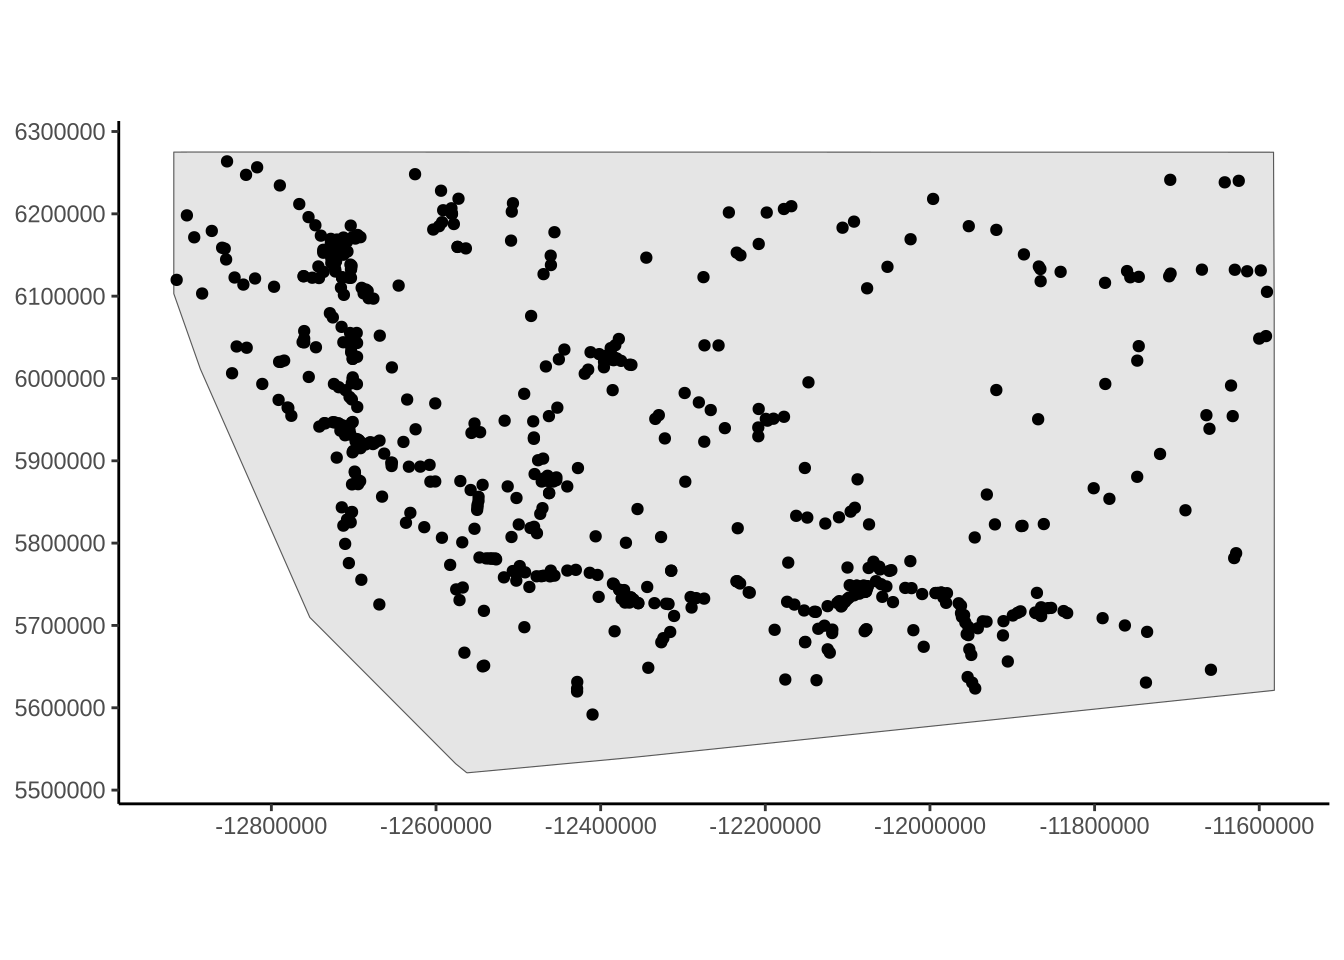

In [ ]:
# convert accident_sf to a ppp object so we can use it to find an intensity function later
accidents_sfc <- accidents_sf |> sf::st_as_sfc()
accidents_ppp <- as.ppp(accidents_sfc, W=as.owin(mt_hull_sf))
# plot the ppp object
accidents_ppp |> sf::st_as_sf() |> ggplot() + 
    geom_sf() +
    theme_classic()

Here, the point pattern object of accident locations is used to generate a density estimate, providing a smoothed representation of accident intensity across the landscape. The map highlights areas with higher concentrations of accidents, which are overlaid with contour lines for clarity. This identifies hotspots and is used later in analysis for the Monte Carlo simulation.

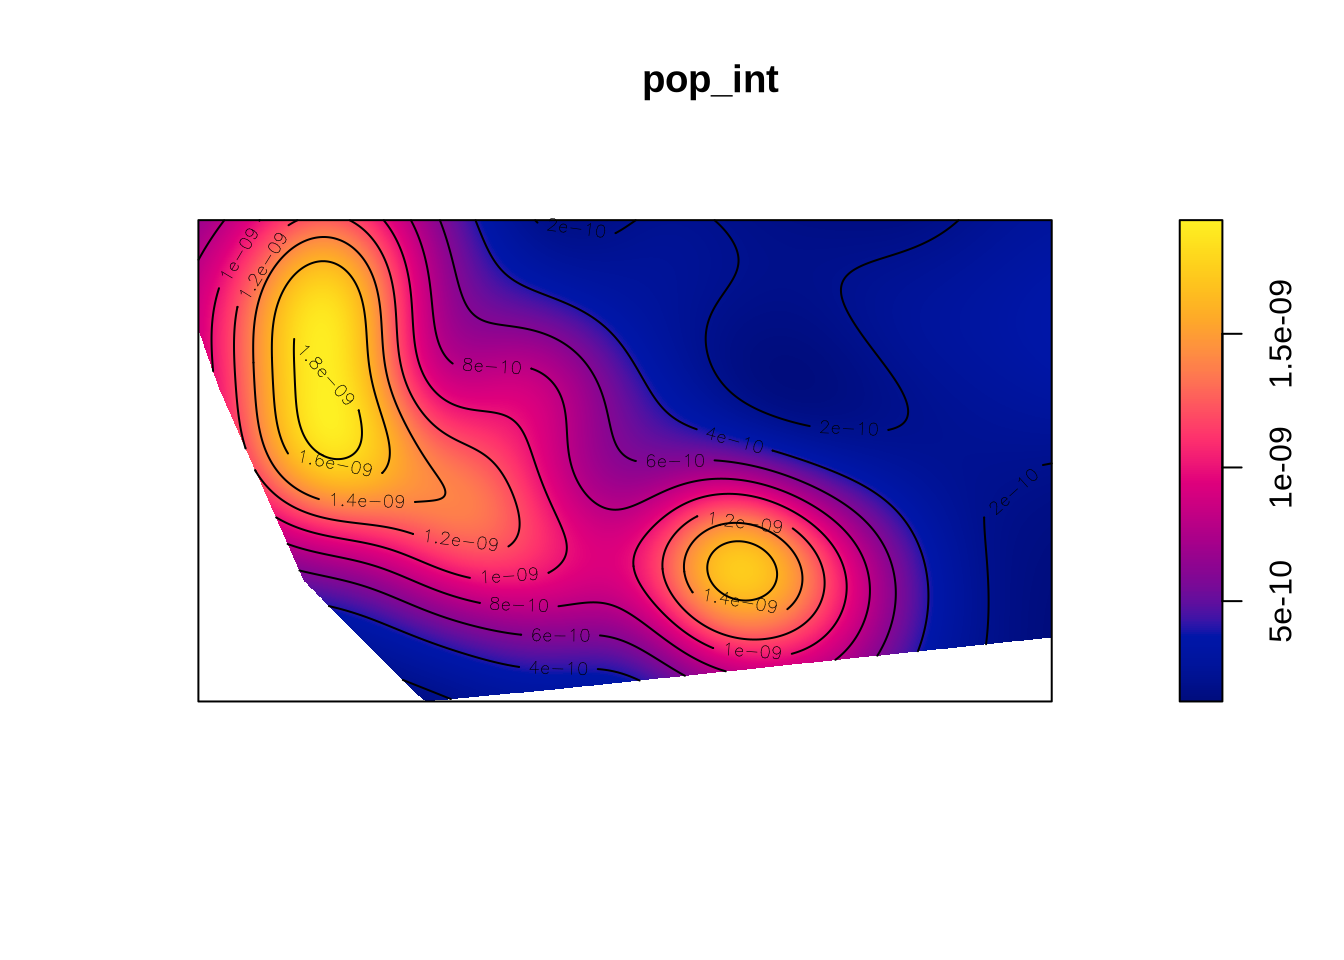

In [ ]:
# calculate density of our population of fatal car accidents
pop_int <- density(accidents_ppp, eps=raster_eps)
# plot this density and add contour lines
plot(pop_int)
contour(pop_int, add=TRUE)

With the `stars` package, the intensity function can be combined with other geospatial data, such as the accident locations. The resulting visualization combines the density estimates with the actual accident locations, offering a clear and intuitive representation of where accidents are concentrated relative to their raw spatial occurrences.

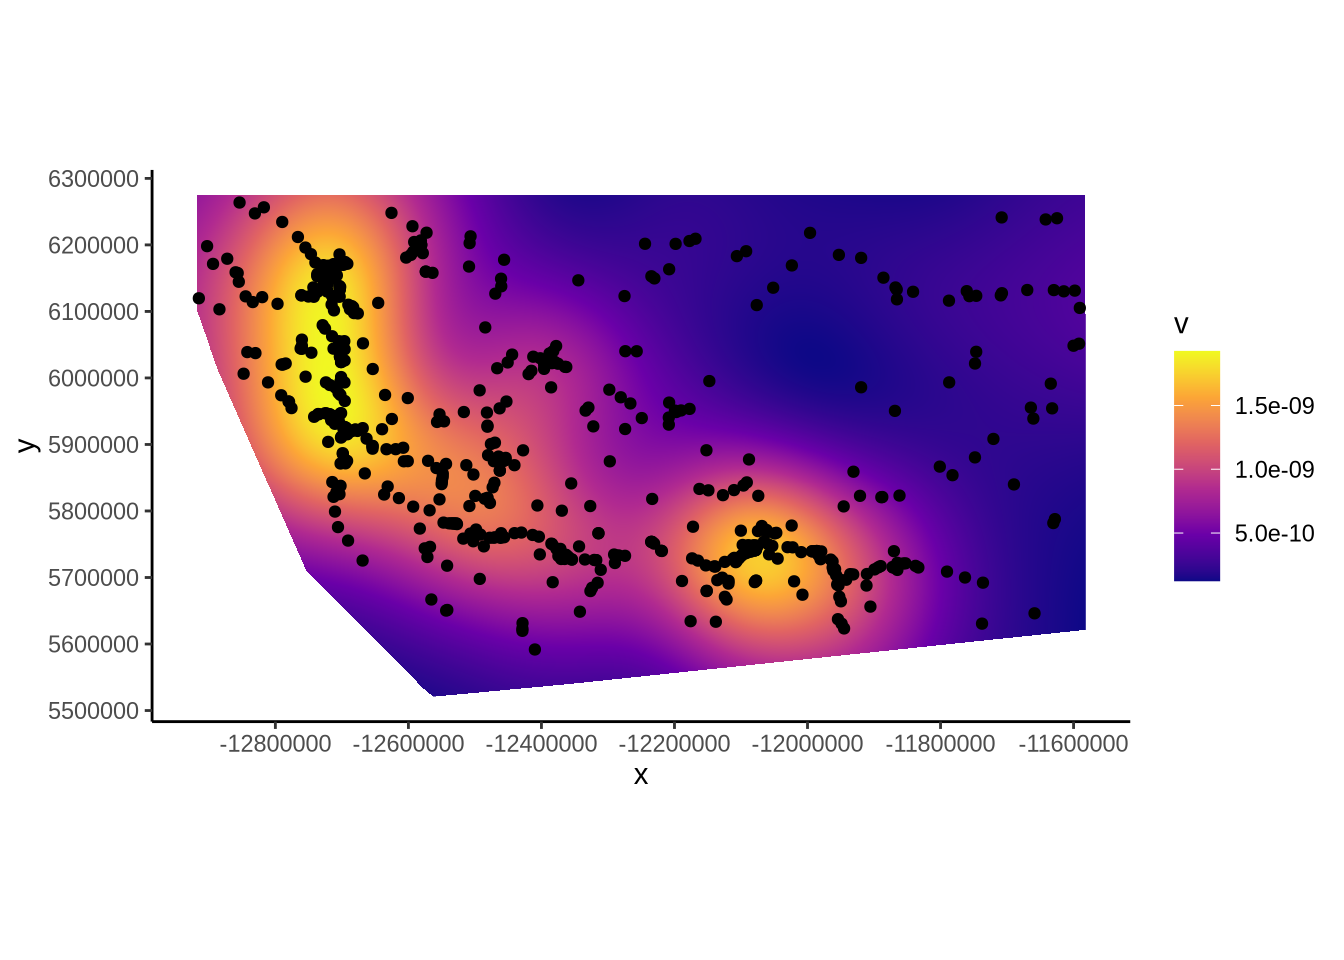

In [ ]:
# convert the density into a stars object
pop_stars <- pop_int |> stars::st_as_stars()
# filter the points from the ppp oject (drop the shape/window)
points_sf <- accidents_ppp |> sf::st_as_sf() |> filter(label == "point")
# plot the points overlayed on the density calculated above 
points_sf |> ggplot() +
  stars::geom_stars(data=pop_stars) +
  geom_sf() +
  theme_classic() +
  scale_fill_viridis_c(option="C", na.value="transparent")

The map below displays the population distribution of accidents in three categories - “Low,” “Medium,” and “High”. This is performed by tessellating the density object from above using intensity quantiles. The process segments the spatial landscape into regions with distinct levels of accident intensity. Not only does the resulting plot provides a clear visual delineation of these intensity regions, it serves as a basis for comparative spatial analysis. Later, it will be used to compute the observed counts of reservation accidents falling into each category.

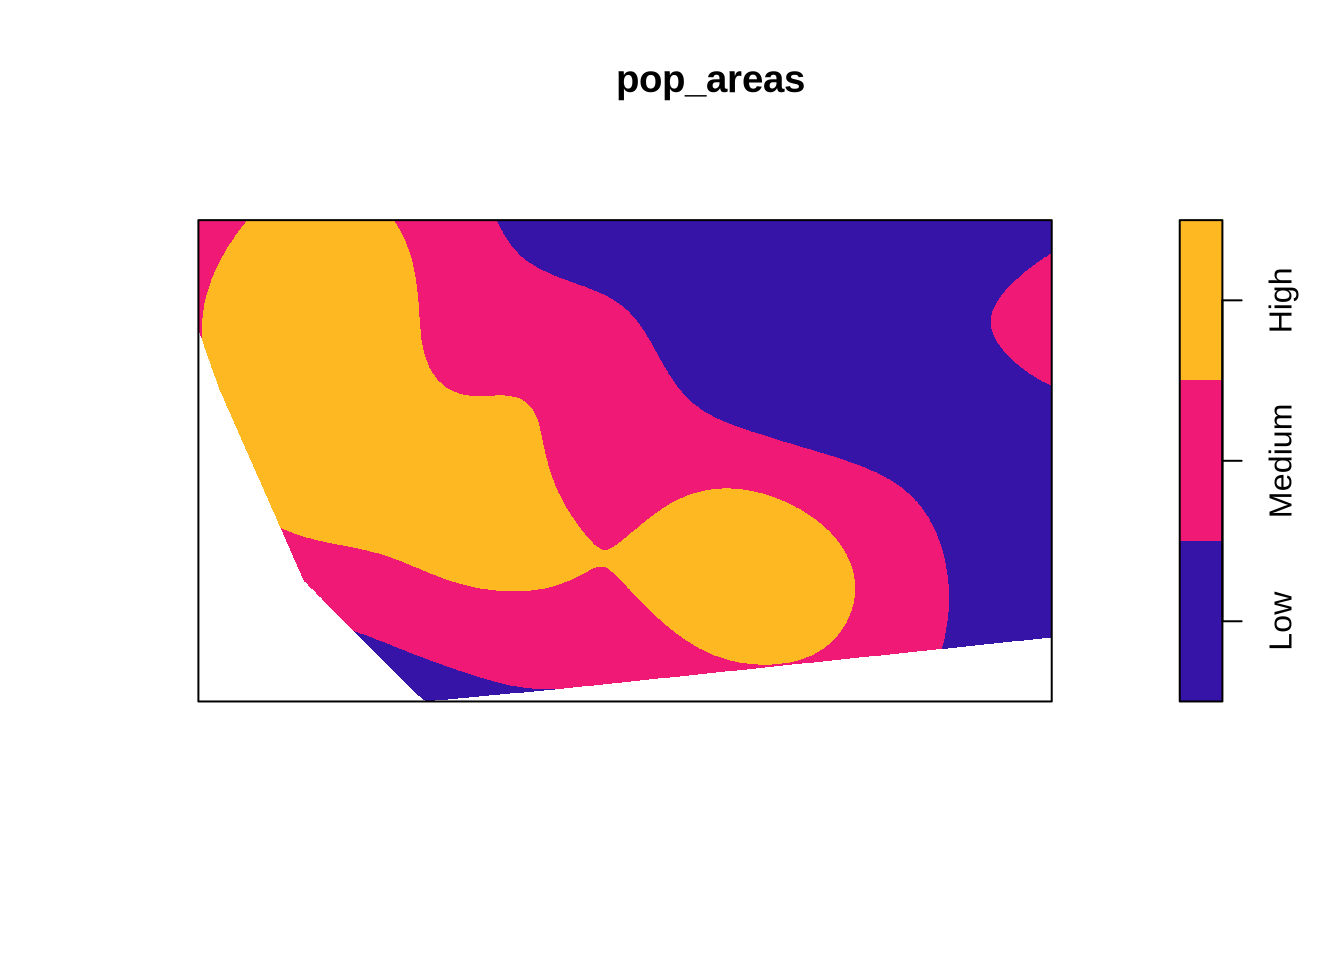

In [ ]:
# define number of regions and labels for tesselation
num_regions <- 3
region_labels <- c("Low", "Medium", "High")
# calculate the quantiles of the population intensity 
pop_quant <- quantile(pop_int, probs=(0:num_regions) / num_regions, na.rm=TRUE)
# divide population intensity into intervals based on the quantiles above
pop_cut <- cut(pop_int, breaks=pop_quant, labels=region_labels)
# partition the population intensity space into subregions based on population of accidents
pop_areas <- tess(image=pop_cut)
# plot the tesselation
plot(pop_areas)

Similar to the first step in this section, the accident data is converted into a spatial point pattern (`ppp`) object. This time it is exclusively the accidents that occurred within a reservation.

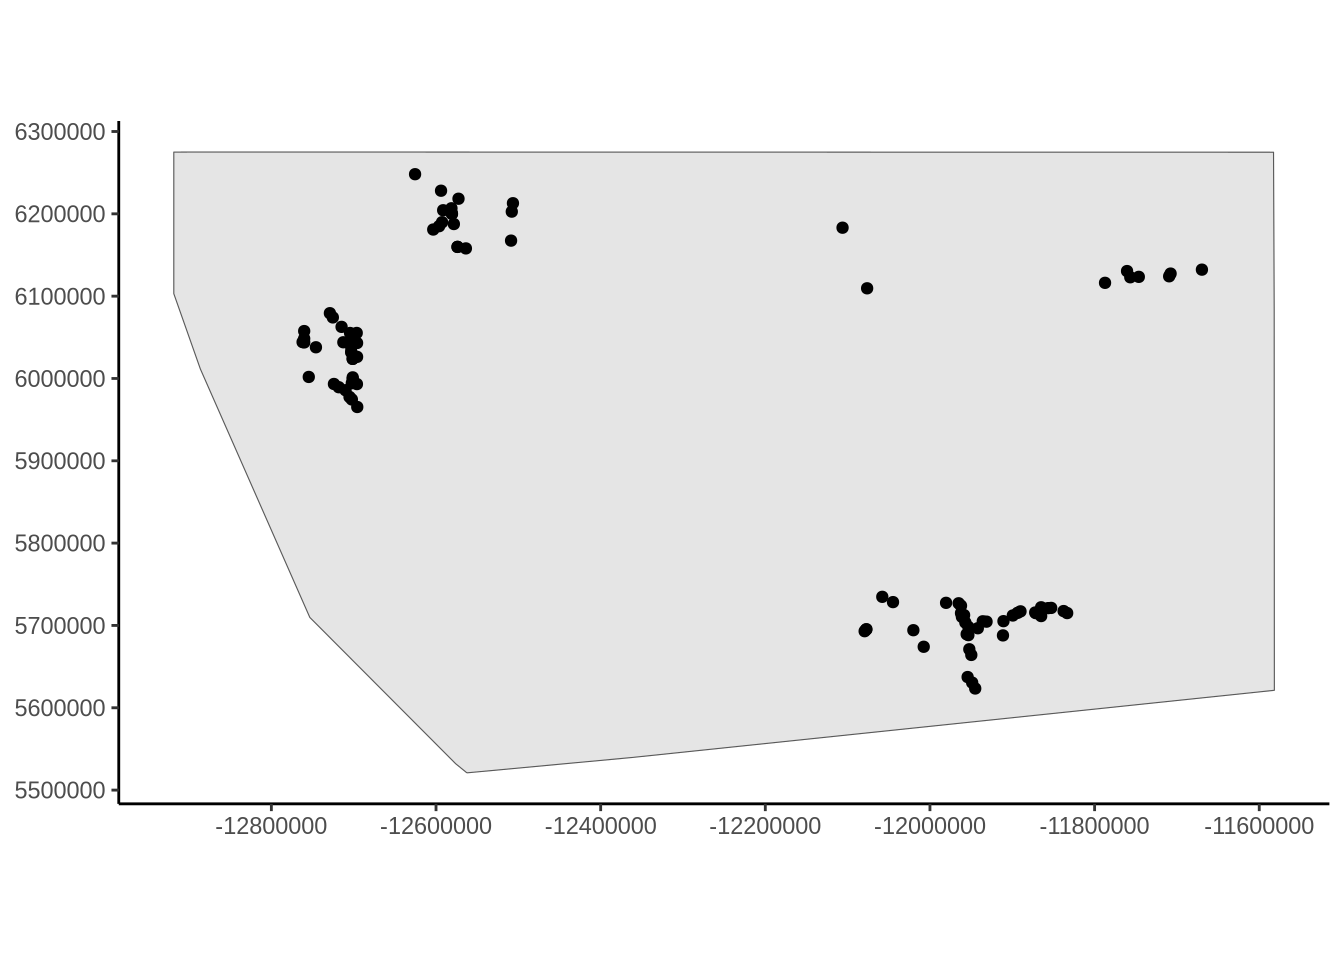

In [ ]:
# convert accidents on reservations to a ppp object so we can use it to find an intensity function later
accidents_rez_sfc <- accidents_sf |> filter(reservation==TRUE) |> sf::st_as_sfc()
accidents_rez_ppp <- as.ppp(accidents_rez_sfc, W=as.owin(mt_hull_sf))
# plot the ppp object
accidents_rez_ppp |> sf::st_as_sf() |> ggplot() + 
    geom_sf() +
    theme_classic()

The next two plots follow the steps from above where density was calculated and plotted with contour lines. Then `stars` was used to overlay the accidents on the density plot. Both of these represent only the accidents that happened within the bounds of a reservation.

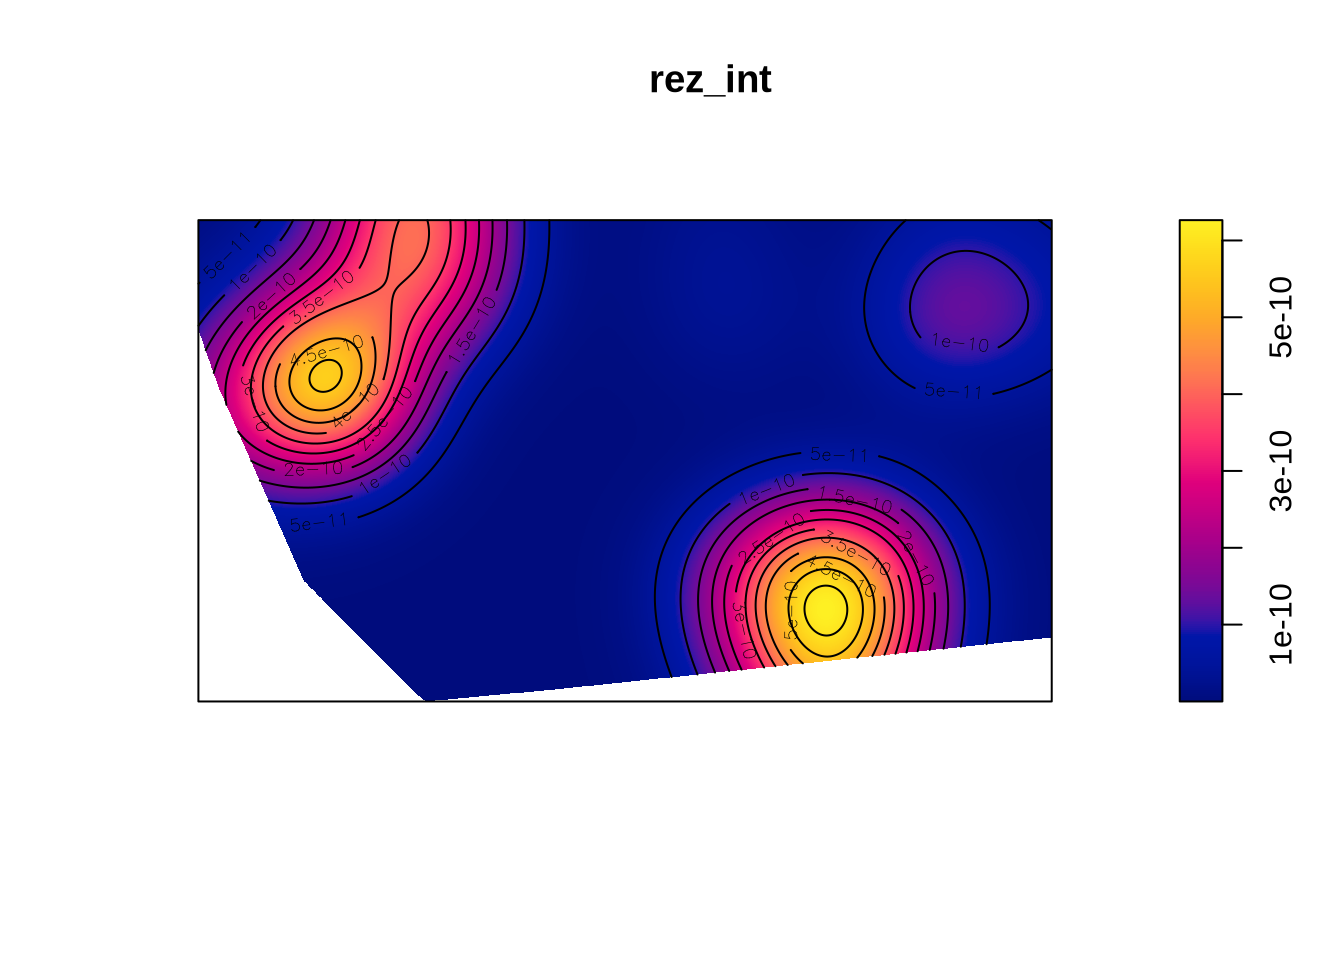

In [ ]:
# calculate density of fatal car accidents that occured on reservations
rez_int <- density(accidents_rez_ppp, eps=raster_eps)
# plot the intensity function and add contour lines
plot(rez_int)
contour(rez_int, add=TRUE)

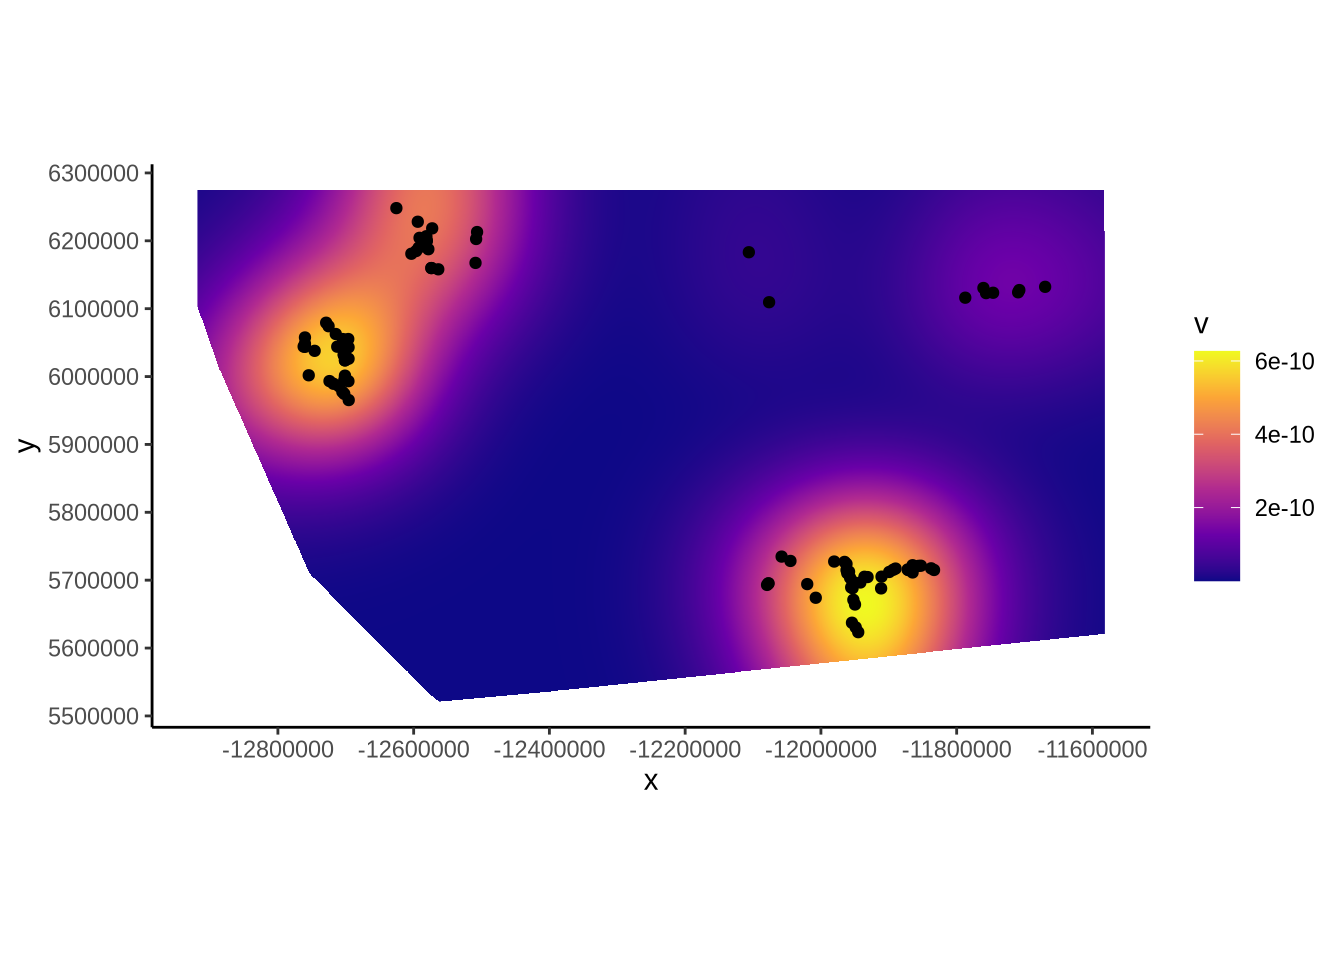

In [ ]:
# convert the reservation density into a stars object
rez_stars <- rez_int |> stars::st_as_stars()
# filter the points from the ppp oject (drop the shape/window)
rez_points_sf <- accidents_rez_ppp |> sf::st_as_sf() |> filter(label == "point")
# plot the points overlayed on the density calculated above
rez_points_sf |> ggplot() +
  stars::geom_stars(data=rez_stars) +
  geom_sf() +
  theme_classic() +
  scale_fill_viridis_c(option="C", na.value="transparent")

As a final step before simulation, the observed test statistic must be computed. The `quadratcount` function is used to calculate the number of fatal car accidents occurring within each population intensity region (“Low,” “Medium,” and “High”) defined by the tessellation. The output is converted into a tidy data frame with the counts labeled according to their respective intensity categories. This tabular representation provides a clear summary of how accidents are distributed across regions with varying population intensities, and serve as the test statistic for the hypothesis test.

In [ ]:
# count the number of accidents that occured in each population region
obs_rez_counts <- quadratcount(accidents_rez_ppp, tess=pop_areas) |> as.vector()
# reassign column names to predefined labels
names(obs_rez_counts) <- region_labels
# convert the list object into a data frame
obs_rez_counts <- obs_rez_counts |> tibble::as_tibble_row()
obs_rez_counts

    Low   Medium   High
  ----- -------- ------
      8       21     66


Finally, Monte Carlo simulation can utilized to assess the spatial randomness of the fatal car accidents. This is where the full population intensity function from before comes into play. First, 999 simulated point patterns are created, each of which are the same size as the observed point pattern and are drawn from the probability density of the population of all car accidents. This means that each of these point patterns would represent what accidents would look like if the likelihood of an accident at a point was proportional to the population density of accidents at that point. Next, quadrat counts are computed for each of point patterns, so the result is a data frame with 999 rows and 3 columns, which represent the counts of accidents that fall within the three intensity categories.

The plot below shows the distribution of the “High” population category across all the simulations. Superimposed as a red dashed line is the observed value. In the original data, around 66 of accidents that occurred on a reservation fell within a “High” accident area. Visually, this is quite a bit higher than what occurs in the simulated data. It appears that fatal accidents on reservations is disproportionately higher than what should be expected. It is necessary to compute a p-value to test the statistical significance of this difference.

In [ ]:
# function that takes a simulated ppp object and counts the number of 
# accidents that occurred in each population region
compute_quadrat_counts <- function(sim_ppp) {
  sim_counts <- quadratcount(sim_ppp, tess=pop_areas) |> as.vector()
  names(sim_counts) <- region_labels
  return(sim_counts)
}
# function that takes a number of ppp obejcts to generate and generates
# that many random ppp objects sampled from the whole distribution of 
# car accidents (pop_int from above)
gen_sims_ppp <- function(num_sims) {
  gen_sims <- spatstat.random::rpoint(
    n = nrow(rez_points_sf),
    f = pop_int,
    nsim = num_sims
  )
  return(gen_sims)
}
# use function created above to simulate 999 ppp objects
full_sims_list <- gen_sims_ppp(999)
# for each of the simulated ppp objects, calculate the quadrat counts 
full_count_list <- lapply(X = full_sims_list, FUN=compute_quadrat_counts)
# take the list object and turn it into data frame where each column represents a population region
# and each row represents on the simulated ppp object counts
full_count_df <- full_count_list |> as_tibble() |> t() |> as_tibble(.name_repair="unique")

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`

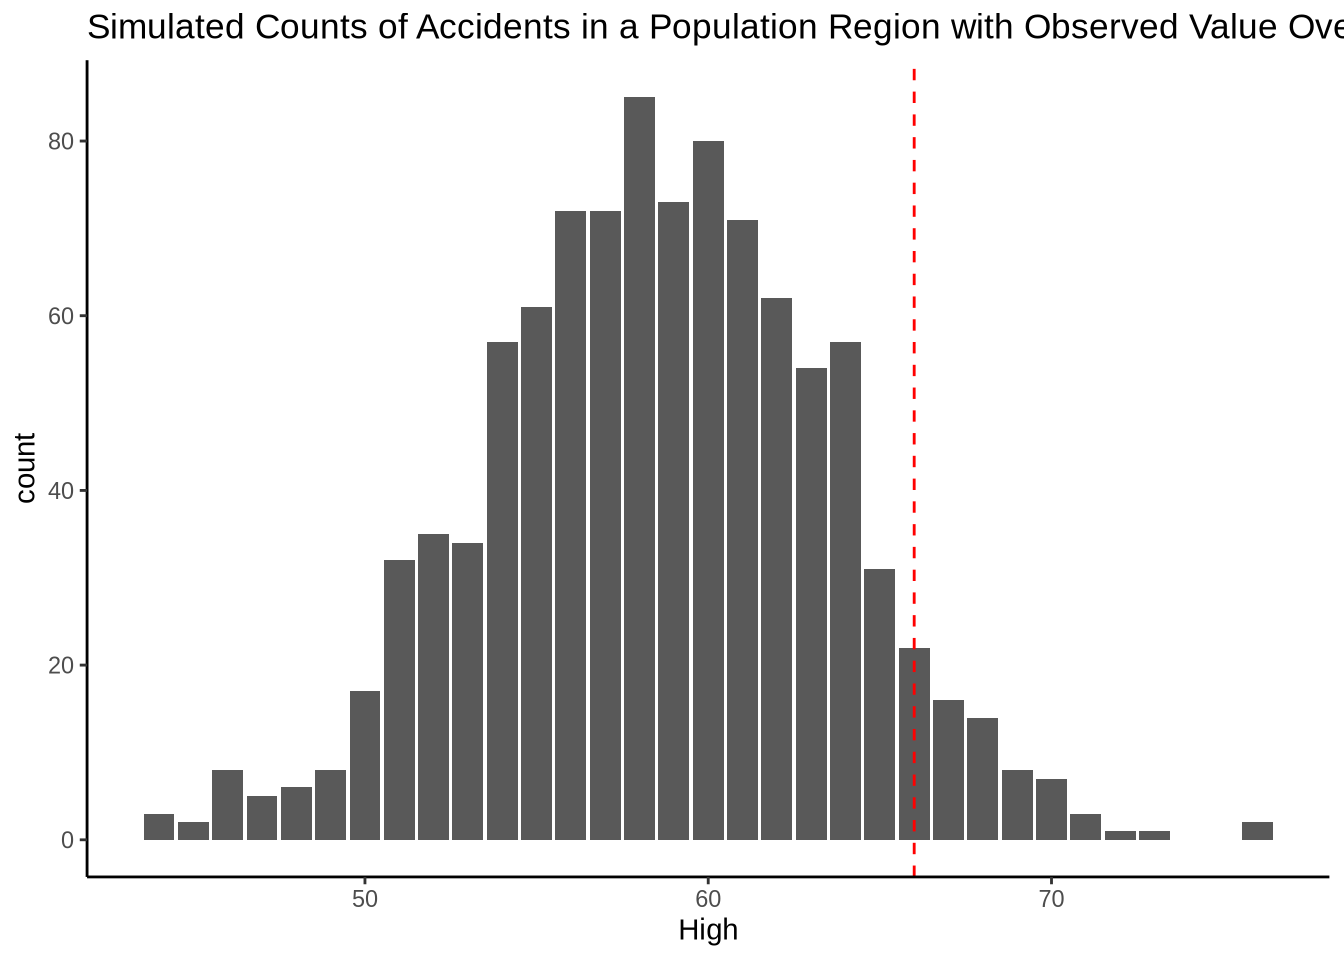

In [ ]:
# combine the count df and the observed values from the data
mc_df <- bind_rows(full_count_df, obs_rez_counts)
# plot the simulated counts for the "high" population region
# add line for the observed value in the reservation counts
full_count_df |> ggplot(aes(x=High)) +
  geom_bar(stat='count') +
  geom_vline(xintercept = obs_rez_counts$High, linetype="dashed", color='red') +
  theme_classic() +
  ggtitle("Simulated Counts of Accidents in a Population Region with Observed Value Overlay")

The p-value is determined by calculating the proportion of simulated values from the “High” region that are greater than or equal to the observed value. The p-value is small, but does not meet the standard 0.05 threshold. However, at the 0.1 significance level, the calculated p-value would indicate that the observed count is unlikely to have occurred by chance, providing evidence to reject the null hypothesis and conclude that the spatial distribution is non-random.

In [ ]:
# calculate the p value by finding the proportion of simulated values in
# the "high" region that were larger than our observed value
p_val_high <- nrow(mc_df[mc_df$High >= obs_rez_counts$High,]) / nrow(mc_df)
p_val_high

[1] 0.075

### Moran’s I

The calculation of Moran’s I for both reservation and non-reservation areas aims to measure the degree of spatial autocorrelation in the distribution of fatal car accidents across Montana. Moran’s I is a statistic that quantifies how similar accident counts are in neighboring areas.

To compute Moran’s I for both reservation and non-reservation areas, a grid is created over Montana and clipped to the state boundary. Each grid cell is labeled as either “on reservation” or “off reservation” based on its intersection with reservation boundaries. The number of accidents within each grid cell is then counted, creating two distinct datasets for reservation and non-reservation areas.

Spatial neighbors for each grid cell are identified using “queen” contiguity, which considers cells as neighbors if they share a boundary or a corner. This neighborhood structure is used to generate spatial weight matrices, which form the basis for Moran’s I calculations. A Moran’s I test is then conducted separately for both reservation and non-reservation grids. The resulting test statistic indicates whether accidents in these areas exhibit spatial clustering or randomness.

In [ ]:
# create a grid over mt hull
grid <- sf::st_make_grid(mt_hull_sf)
# convert this grid into a sf object
grid_sf <- sf::st_sf(geometry=grid)
# clip the sf grid to only the mt hull
grid_sf <- sf::st_intersection(grid_sf, mt_hull_sf)

all geometries

`summarise()` has grouped output by 'geometry'. You can override using the
`.groups` argument.

Warning in spdep::poly2nb(rez_grid, queen = TRUE): neighbour object has 3 sub-graphs;
if this sub-graph count seems unexpected, try increasing the snap argument.

**Reservations**

In [ ]:
rez_moran$estimate[1]

Moran I statistic 
        0.3104038 

**Non-Reservations**

In [ ]:
non_rez_moran$estimate[1]

Moran I statistic 
        0.1084974 

The Moran’s I statistic of 0.3104 for reservations, suggests moderate positive spatial autocorrelation. This means that accidents in reservation areas tend to cluster together, with neighboring grid cells having similar accident counts. For non-reservations the statistic of 0.1085 is also positive but much smaller than the value for reservations. This indicates weaker spatial clustering, suggesting that while accidents in non-reservation areas show some tendency to cluster, the spatial pattern is less pronounced compared to reservation areas. These findings suggest that fatal car accidents are more likely to cluster in reservation areas than in non-reservation areas, where the spatial pattern appears more dispersed.

## Discussion

By employing exploratory data analysis, hypothesis testing, and spatial autocorrelation measures, the analysis uncovered meaningful spatial patterns that warrant further interpretation. This section discusses the key findings, their implications, limitations, and directions for future research.

### Key Findings

This study revealed measurable spatial clustering of fatal car accidents on Montana’s reservations, as evidenced by both the Monte Carlo simulation and Moran’s I statistic. The observed count of accidents in high-intensity population regions was noticeably greater than expected under the null hypothesis of spatial randomness, with a p-value close to conventional significance levels. Furthermore, Moran’s I results demonstrated moderate positive spatial autocorrelation on reservations (**I = 0.3104**) compared to much weaker clustering off reservations (**I = 0.1085**).

These findings suggest that accidents on reservations are not distributed randomly but are instead influenced by underlying factors that contribute to spatial clustering. In contrast, the weaker autocorrelation in non-reservation areas indicates a more dispersed pattern, potentially reflecting differences in road infrastructure, population density, or traffic patterns.

### Implications

The pronounced spatial clustering of accidents on reservations highlights the need for targeted interventions to address safety concerns in these areas. Factors such as road design, traffic enforcement, and accessibility of emergency services may contribute to the observed patterns and should be investigated further. Understanding these dynamics could inform policy and resource allocation to reduce fatal accidents on reservations. The findings here further support the analysis of @richard_retting_analysis_2021, emphasizing the need for intervention and action to relieve the disparity that exists for these populations.

While the focus was on AI/AN individuals, it is evident that there is a larger problem in the state that contributes to the large number of traffic fatalities. Targeted innervations may address some of the problems for AI/AN populations, but may fall short if there is not an overall improvisation of general highway safety in Montana. The weaker clustering in non-reservation areas suggests that interventions in these regions may require broader strategies, as accidents appear less tied to specific locations. Differences between reservation and non-reservation areas underscore the importance of tailored approaches to improving road safety.

### Limitations

While this study provides valuable insights into the spatial distribution of fatal car accidents in Montana, several limitations should be acknowledged. First, the analysis of spatial autocorrelation using Moran’s I relied on aggregated crash counts within grid cells, which may obscure finer-scale patterns. Smaller-scale variations in accident distribution, particularly those occurring near specific road features or intersections, could be masked by this approach.

Second, the study did not incorporate underlying causal factors such as road conditions, traffic volume, weather, or socioeconomic characteristics. These factors likely play a significant role in shaping accident distributions, and their exclusion limits the ability to draw conclusions about the causes of observed spatial patterns. Additionally, the analysis was purely spatial and did not explore temporal dynamics. Patterns of accidents may vary over time due to seasonal trends, annual changes, or specific events, and these temporal aspects remain unexplored in this study.

Finally, boundary effects represent another limitation. The grid-based approach to spatial analysis, particularly near the boundaries of reservations, may introduce artifacts. The abrupt delineation between reservation and non-reservation areas could exaggerate or obscure patterns that might be more continuous in nature. Addressing these limitations in future studies would strengthen the findings and provide a more comprehensive understanding of the factors influencing spatial patterns of fatal car accidents.

### Future Work

Future research should aim to build upon the findings of this study by incorporating additional explanatory variables that may influence spatial clustering of fatal car accidents. Factors such as road characteristics, traffic volume, demographic information, and weather conditions could provide critical context for understanding the drivers of accident patterns. For instance, areas with poor road maintenance or high traffic congestion may exhibit unique clustering behaviors, and accounting for these variables would improve the robustness of the analysis.

Temporal analysis represents another avenue for extending this research. Examining trends over time or seasonal variations in accident patterns could uncover temporal dynamics that are not apparent in a purely spatial analysis. This is especially important for a state like Montana that experiences harsh winters and does not treat its roads. These and other weather conditions might contribute to seasonal spikes in accidents, which could inform the timing of targeted interventions.

The observation window for spatial analysis could also be refined by focusing on Montana’s road network rather than the entire state. Since car accidents predominantly occur on or near roads, this approach would provide a more accurate representation of the underlying spatial processes. By aligning the analysis with the geographic features most relevant to the phenomena, researchers can produce more precise and actionable insights. Instead of the large, sparsely populated, convex hull of Montana used in this analysis, a webbing of the states roads would better represent the observation window of interest in this study.

Additionally, fine-scale modeling could be used to better understand the scalar dependence of clustering patterns. Calculating Moran’s I using varying grid sizes might reveal how spatial relationships change with scale, providing a deeper understanding of accident dynamics across different resolutions.

Finally, comparative studies across other states or regions could offer valuable insights into how reservation and non-reservation areas differ in accident patterns on a broader scale. Such comparisons would help identify universal versus region-specific factors, enabling more generalizable conclusions about the spatial distribution of fatal car accidents. These extensions would greatly enhance the scope and applicability of this research.

## Conclusion

This study examined the spatial distribution of fatal car accidents in Montana, focusing on differences between reservation and non-reservation areas. The findings reveal that accidents on reservations tend to cluster more tightly compared to the broader, more dispersed patterns observed off reservations. This clustering was confirmed through statistical analysis, showing stronger spatial relationships in reservation areas. These patterns suggest that unique factors, such as road conditions, infrastructure, or traffic patterns, may contribute to the increased concentration of accidents in these regions.

These results highlight the need for targeted road safety measures on reservations to address the underlying causes of these clusters. Improved infrastructure, enforcement, and emergency response resources could help mitigate accident rates. While this study identifies important patterns, further research is needed to explore the specific factors driving these differences and to develop effective, regionally tailored interventions to enhance road safety for all Montana residents.

## References